 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Find-the-longest-streak-of-'A'-Nucleotide" data-toc-modified-id="Find-the-longest-streak-of-'A'-Nucleotide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find the longest streak of 'A' Nucleotide</a></span><ul class="toc-item"><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Total-'A'-count-per-read" data-toc-modified-id="Total-'A'-count-per-read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total 'A' count per read</a></span><ul class="toc-item"><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Count-DNA-reads-by-pool" data-toc-modified-id="Count-DNA-reads-by-pool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Count DNA reads by pool</a></span><ul class="toc-item"><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Demultiplexing" data-toc-modified-id="Demultiplexing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Demultiplexing</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Count-longest-streak-of-'A'-by-the-pool" data-toc-modified-id="Count-longest-streak-of-'A'-by-the-pool-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Count longest streak of 'A' by the pool</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Poly-A-tail-analysis" data-toc-modified-id="Poly-A-tail-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Poly-A tail analysis</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Consensus-matrix-on-strings-after-poly-A-tail" data-toc-modified-id="Consensus-matrix-on-strings-after-poly-A-tail-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Consensus matrix on strings after poly A tail</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Find-consensus-sequence-(=-artefact)-after-Poly-A-tail" data-toc-modified-id="Find-consensus-sequence-(=-artefact)-after-Poly-A-tail-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find consensus sequence (= artefact) after Poly A tail</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Error-probability-of-the-base-based-on-phred-score" data-toc-modified-id="Error-probability-of-the-base-based-on-phred-score-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Error probability of the base based on phred score</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Markov-chain-after-PolyA-analysis" data-toc-modified-id="Markov-chain-after-PolyA-analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Markov chain after PolyA analysis</a></span></li></ul></div>

# Find the longest streak of 'A' Nucleotide

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# count dna_reads in a file
# open file
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
dna_reads = []
lines_count = 160000  # number of lines in a file
#Result = []

# make lists of dna reads
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for current_line in range(lines_count):
        if current_line % 4 == 1:  # pick lines with DNA sequences
            s = f.readline()
            s = s.replace('\n', '')
            dna_reads.append(s)
        else:
            next(f)

In [96]:
def size_of_list(my_list):
    """size of my_list in MB"""
    import sys
    return sum([sys.getsizeof(i) for i in my_list]) / 1024 / 1024

In [97]:
def histo(values, plot_title='empty title'):
    """show a histogram based on list"""
    import matplotlib.pyplot as plt

    plt.bar(range(len(values)),values)
    plt.title(plot_title)
    plt.show()


In [98]:
def longest_a_streak(dna):
    """find longest streak of A in a string"""
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [99]:
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

In [100]:
# create a list with 61 zeroes
longest_a_histo = [0 for i in range(61)]

# add +1 to the correponding position when we see an element
# i.e. if we see element 13 in "result", add +1 to position 13 in "longest_a_histo"
for r in result:
    longest_a_histo[r] += 1

print(longest_a_histo)

[4, 576, 6101, 2563, 1412, 937, 841, 839, 713, 830, 994, 1249, 1631, 1777, 1927, 1840, 1947, 2083, 2025, 2007, 1849, 1657, 1266, 926, 665, 438, 314, 201, 134, 93, 52, 26, 23, 23, 10, 7, 5, 4, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


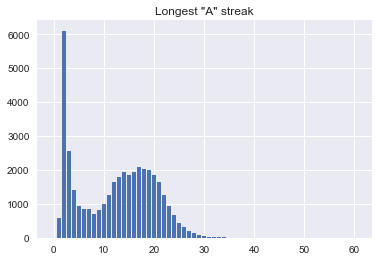

In [101]:
histo(longest_a_histo, 'Longest "A" streak')

## Conclusion
- The most "popular" A streak is of length 2 (it can be found in >6000 reads out of 40k)
- The most common A streak is of length 10-25 


# Total 'A' count per read

In [102]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0

In [103]:
total_a = [0 for i in range(61)]
for r in result:
    total_a[r] += 1

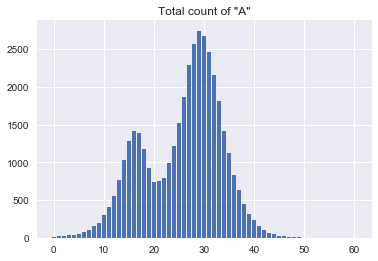

In [104]:
histo(total_a, plot_title='Total count of "A"')

## Conclusion
- We expect to have 25% of A. 

- More than 20 bases per read are encountered in {{suspicious_reads}}% of all reads


# Count DNA reads by pool 

In [105]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

# # or we can create this dict ourselves
# pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
# {pool: 0 for pool in pools}

In [106]:
for read in dna_reads:
    pool = read[3:7]
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1

In [107]:
print(d)

{'ACAG': 6374, 'AGTC': 7039, 'ATCA': 5960, 'CATG': 6634, 'CTAC': 7194, 'TCTA': 1, 'TGAT': 0, 'TTGG': 5564, 'unknown': 1234}


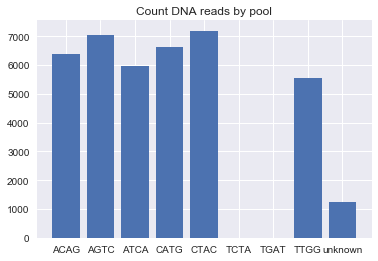

In [108]:
# order in a dict is not guaranteed, so we may get weird results
plt.bar(range(len(d.keys())),d.values())
plt.xticks(range(len(d)), list(sorted(d.keys())))
plt.title('Count DNA reads by pool')
plt.show()

## Conclusion
- 2 given pools from the wet lab were not found 

# Demultiplexing


In [109]:
def hamming_distance(dna1, dna2):
    assert isinstance(dna1, str)
    assert isinstance(dna2, str)

    distance = 0
    for b1, b2 in zip(dna1, dna2):
        if b1 != b2:
            distance += 1
    return distance

assert hamming_distance('AAAA', 'unknown') == 4

In [110]:
def pool_correction(read_pool, list_of_pools, max_ham_dist = 1):
    """compare given pool against list of pools and correct it"""
    assert isinstance(read_pool, str)
    assert isinstance(list_of_pools, list)
    for p in list_of_pools:
        dist = hamming_distance(p, read_pool)
        if dist == 0:
            return p
        elif dist <= max_ham_dist:
            return p
    return 'unknown'

pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
assert pool_correction('ACAT', pools) == 'ACAG'
assert pool_correction('TTGG', pools) == 'TTGG'
assert pool_correction('MMMM', pools) == 'unknown'
assert pool_correction('ACTA', pools, max_ham_dist=2) == 'ACAG'

In [111]:
# 1 initialize dict
# 2 add corrected pools
# 3 plot

import plotly.plotly as py
import plotly.graph_objs as go

data = list()
for hamming_dist in range(3):
    d = {
    'ACAG': 0,
    'AGTC': 0,
    'ATCA': 0,
    'CATG': 0,
    'CTAC': 0,
    'TCTA': 0,
    'TGAT': 0,
    'TTGG': 0,
    'unknown': 0
    }


    for read in dna_reads:
        pool = read[3:7]
        pool = pool_correction(pool, pools, hamming_dist)
        d[pool] += 1
    keys, values = zip(*d.items())

    trace = go.Bar(
        x=keys,
        y=values,
        name='Hamming distance of ' + str(hamming_dist)
    )
    data.append(trace)

#     plot_from_dict(d, plot_title= "Hamming distance of " + str(hamming_dist))
py.iplot(data, filename = 'basic-line')

# Count longest streak of 'A' by the pool

In [112]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

# create a dictionary with keys as strings from pools and for values empty list with 61 zeroes
d = {k: list(0 for i in range(61)) for k in pools}

In [113]:
for read in dna_reads:
    pool = read[3:7]
    longest_a_streak_in_pool = longest_a_streak(read)
    lst_61_zeroes = d[pool] if pool in d.keys() else d['unknown']
    lst_61_zeroes[longest_a_streak_in_pool] += 1

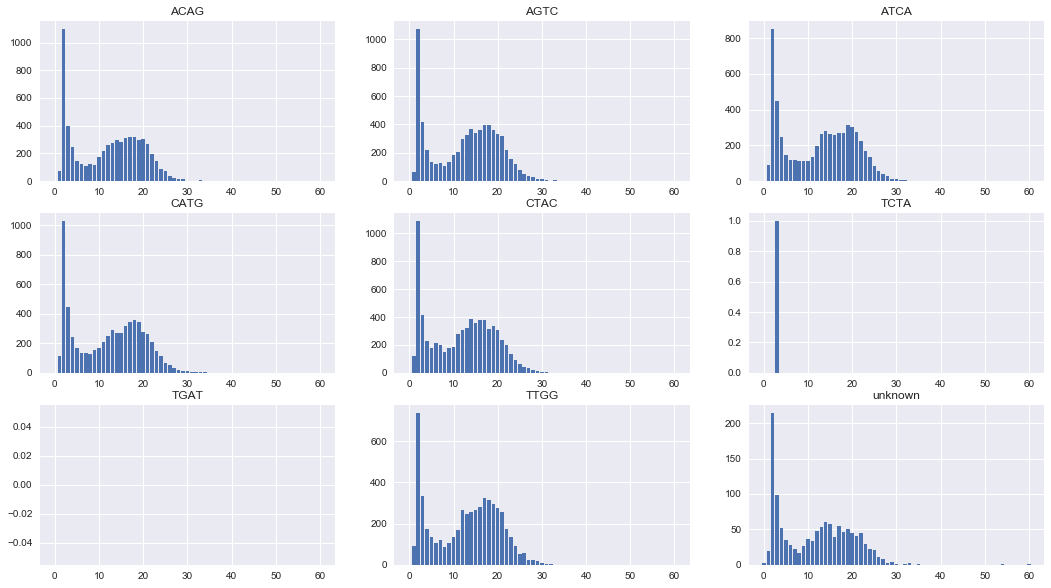

In [114]:
from itertools import product
graph_position = list(product(range(3), range(3)))

dim = {'x': 3, 'y': 3}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 10))

for coordinates, d_pool in zip(graph_position, d.items()):
    i, j = coordinates
    k, v = d_pool
    axarr[i, j].bar(range(len(v)),v)
    axarr[i, j].set_title(k)

plt.show()

# Poly-A tail analysis

In [115]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [116]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC") == 'TCCCC'
assert after_polyatail("ACACAT") == ''

In [117]:
from collections import Counter

for i in range(1,11):
    after_a = list()
    for read in dna_reads:
        s = after_polyatail(read, i)
        if s != '': # read didn't have min polyA tail -> returns ''
            after_a.append(s)
    print(Counter(after_a).most_common(6))


[('C', 12249), ('G', 6693), ('T', 6022), ('N', 18)]
[('CC', 4980), ('CA', 3388), ('TC', 2116), ('CG', 2002), ('GC', 1976), ('GG', 1912)]
[('CCC', 2390), ('CAA', 1332), ('CCA', 1099), ('CAC', 1046), ('GAA', 955), ('GGG', 848)]
[('CCCC', 1257), ('CAAA', 645), ('GAAA', 605), ('CCCA', 452), ('GGGG', 442), ('CCAA', 415)]
[('CCCCC', 680), ('GAAAA', 388), ('CAAAA', 346), ('GGGGG', 241), ('CCCCA', 213), ('CCAAA', 197)]
[('CCCCCC', 330), ('GAAAAA', 244), ('CAAAAA', 190), ('GGGGGG', 121), ('CCCCCA', 119), ('CCCCCT', 117)]
[('GAAAAAA', 153), ('CCCCCCC', 148), ('CAAAAAA', 115), ('GGGGGGG', 68), ('CCCCCCT', 62), ('CCCCCCG', 59)]
[('GAAAAAAA', 82), ('CCCCCCCC', 67), ('CAAAAAAA', 64), ('C', 50), ('T', 35), ('GGGGGGGG', 34)]
[('C', 50), ('GAAAAAAAA', 38), ('T', 35), ('G', 28), ('GAAAAGAAA', 26), ('CAAAAAAAA', 24)]
[('C', 50), ('T', 35), ('G', 28), ('CC', 20), ('GAAAAGAAAA', 20), ('TC', 17)]


# Consensus matrix on strings after poly A tail

In [118]:
# create a matrix with 5 rows and 10 columns, where every element is 0
matrix = [[0 for i in range(10)] for i in range(5)]
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [119]:
after_a = list()
for read in dna_reads:
    s = after_polyatail(read, 10)
    if s != '': # read didn't have min polyA tail -> returns ''
        after_a.append(s)

In [120]:
for s in after_a:
    for index, base in enumerate(s):
        if base == 'A':
            matrix[0][index] += 1
        elif base == 'C':
            matrix[1][index] += 1
        elif base == 'T':
            matrix[2][index] += 1
        elif base == 'G':
            matrix[3][index] += 1
        elif base == 'N':
            matrix[4][index] += 1
        else:
            print("Unexpected letter")

In [121]:
import pandas
df = pandas.DataFrame(matrix)
df.rename({0: 'A', 1: 'C', 2: 'T', 3: 'G', 4: 'N'})

# # as an alternative we can generate dict for .rename() ourselves
# alphabet = 'ACTGN'
# {k: v for k, v in zip(range(len(alphabet)), alphabet)}

,0,1,2,3,4,5,6,7,8,9
A,0,6243,6907,7049,6451,6306,6073,6361,6484,7109
C,12249,9073,8442,8023,7968,7059,5835,5887,5236,4796
T,6022,4311,3960,4089,4203,4751,5334,4934,5198,4873
G,6693,5238,5422,5460,5889,6253,6995,6923,7029,7033
N,18,1,5,0,1,0,0,0,0,2


# Find consensus sequence (= artefact) after Poly A tail

In [122]:
rotated_after_a = [''.join(s) for s in zip(*after_a)] 
# e.g reads = ['AATC','ACTGA','ATG'] -> reads = ['AAA', ACT', 'TTG', 'CG', 'A' ]

In [123]:
# zip functions can be applied only to the lists of strings of the same lengh.
# If the string is shorter than the string with max length -> add space to the string
max_length = (len(max(after_a, key=len)))


for index, s in enumerate(after_a):
    if len(s) != max_length:  # if len of current string is not the same as maximum length
             after_a[index] = s + ' ' * ( max_length - len(s) ) 

after_a_rotated = ([''.join(s) for s in zip(*after_a)])

In [124]:
# count the number of each nucleotide in each column
a_list = []
t_list = []
g_list = []
c_list = []
n_list = []


for read in after_a_rotated:
    a_list.append( read.count( 'A' ))
    t_list.append( read.count( 'T' ))
    g_list.append( read.count( 'G' ))
    c_list.append( read.count( 'C' ))
    n_list.append( read.count( 'N' ))

In [125]:
# define an artefact based on consensus

data = list((zip(a_list, t_list, g_list, c_list, n_list)))
#1st tuple 1st column from the reads

d = {0:'A', 1:'T', 2:'G', 3:'C', 4:'N'}
artefact = str()
for line in data:
    max_value = max( line ) # find max value in current line
    index_of_max_value = line.index( max_value )  # find index of max value in current line
    artefact += d[index_of_max_value]
print( artefact )
    
    

CCCCCCGGGA


# Error probability of the base based on phred score 

In [126]:
def base_calling_error_probabilities(ascii_code):
    assert isinstance(ascii_code, str)
    assert len(ascii_code) == 1
    q = ord(ascii_code) - 33
    p = round(10 ** (-q / 10), 5)
    return p

In [127]:
def disrupted_poly_A(read,min_len_poly_a=8, min_len_poly_a2 = 5):
    """
    find poly A tail in a read that is disrupted only by one base other than 'A'
    
    """
    import re
    
    min_len_poly_a = str(min_len_poly_a)
    min_len_poly_a2 = str(min_len_poly_a2)
    pattern = "[A]{" + min_len_poly_a + ",}([^A])[A]{" + min_len_poly_a2 + ",}"
    m = re.search(pattern, read)  
    if m:
        return m.span(1)[0]
    return ''

In [128]:
from collections import namedtuple
phred_data = namedtuple('PhredData', 'ReadNumber PositionOfBase ErrorProb')
n=160000
result = []
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for line_number in range(n):
        if line_number %4 ==1:
            s = f.readline().replace('\n', '')
            position = disrupted_poly_A(s)
            read_number = line_number
        elif line_number %4 ==3 and position != '':
            s = f.readline().replace('\n', '')
            p = base_calling_error_probabilities(s[position])
            result.append(phred_data(read_number, position, p))
        else:
            next(f)

In [129]:
threshold = 0.5 #min error probability
print(sum([1 for rn, pos, prob in result if prob > threshold]))

for r in result:
    rn, pos, prob = r
    if prob > threshold:
        print(r)


111
PhredData(ReadNumber=285, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=1805, PositionOfBase=33, ErrorProb=0.63096)
PhredData(ReadNumber=1909, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=2229, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=4109, PositionOfBase=27, ErrorProb=0.63096)
PhredData(ReadNumber=4373, PositionOfBase=49, ErrorProb=0.63096)
PhredData(ReadNumber=4669, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=4973, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=5113, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=6625, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=6685, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=7249, PositionOfBase=49, ErrorProb=0.63096)
PhredData(ReadNumber=8361, PositionOfBase=43, ErrorProb=0.63096)
PhredData(ReadNumber=13373, PositionOfBase=27, ErrorProb=0.63096)
PhredData(ReadNumber=13685, PositionOfBase=29, ErrorProb=0.63096)
PhredData(ReadNumber

# Markov chain after PolyA analysis

In [130]:
def after_polyatail(read, next_n_bases=10, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    assert isinstance(read, str)
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a >= min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [131]:
reads=[]
for dna in dna_reads:
    reads.append(after_polyatail(dna, 4, 3))

In [132]:
from itertools import product
alphabet = 'ACTGN'
# let's do all possible transisions
trans = [i+j for i, j in product(alphabet, alphabet)]  # possible transitions

In [133]:
# now lets do a dict where all initial values are 0
d = {k: 0 for k in trans}
print(d)

{'AA': 0, 'AC': 0, 'AT': 0, 'AG': 0, 'AN': 0, 'CA': 0, 'CC': 0, 'CT': 0, 'CG': 0, 'CN': 0, 'TA': 0, 'TC': 0, 'TT': 0, 'TG': 0, 'TN': 0, 'GA': 0, 'GC': 0, 'GT': 0, 'GG': 0, 'GN': 0, 'NA': 0, 'NC': 0, 'NT': 0, 'NG': 0, 'NN': 0}


In [134]:
# always take next 2 letters
result= []
for read in dna_reads:
    for i in range(len(read)):
        result.append((read[i: i+2]))

In [135]:
result[0:10]

['GC', 'CA', 'AT', 'TT', 'TG', 'GG', 'GA', 'AA', 'AA', 'AA']

In [136]:
# now combine this 2 letters with dict
# that means if we see 2 letters, add +1 to coresponding enty in the dict
for two_letters in result:
    if two_letters in d.keys():
        d[two_letters] += 1

In [137]:
print(d)

{'AA': 592392, 'AC': 161284, 'AT': 94862, 'AG': 169939, 'AN': 92, 'CA': 180503, 'CC': 103086, 'CT': 109070, 'CG': 95283, 'CN': 70, 'TA': 58406, 'TC': 132117, 'TT': 94820, 'TG': 93535, 'TN': 33, 'GA': 189049, 'GC': 91599, 'GT': 81500, 'GG': 112065, 'GN': 48, 'NA': 71, 'NC': 44, 'NT': 22, 'NG': 34, 'NN': 76}


In [138]:
total_transitions_to_a = 0
total_transitions_to_c = 0
total_transitions_to_t = 0
total_transitions_to_g = 0
total_transitions_to_n = 0

for k in d.keys():
    if k.startswith('A'):
        total_transitions_to_a += d[k]
    elif k.startswith('C'):
        total_transitions_to_c += d[k]
    elif k.startswith('T'):
        total_transitions_to_t += d[k]
    elif k.startswith('G'):
        total_transitions_to_g += d[k]
    elif k.startswith('N'):
        total_transitions_to_n += d[k]
    else:
        print("we missed a key!")
        

In [139]:
a_prob = []
c_prob = []
t_prob = []
g_prob = []
n_prob = []

for k in trans:
    if k.startswith('A'):
        a_prob.append((d[k] / total_transitions_to_a))
    elif k.startswith('C'):
        c_prob.append((d[k] / total_transitions_to_c))
    elif k.startswith('T'):
        t_prob.append((d[k] / total_transitions_to_t))
    elif k.startswith('G'):
        g_prob.append((d[k] / total_transitions_to_g))
    elif k.startswith('N'):
        n_prob.append((d[k] / total_transitions_to_n))
    else:
        print("we missed a key!")

In [140]:
matrix = [[0 for i in range(len(alphabet))] for i in range(len(alphabet))]
for i in range(len(alphabet)):
    matrix [0][i] = round(a_prob[i], 2)
    matrix [1][i] = round(c_prob[i], 2)
    matrix [2][i] = round(t_prob[i], 2)
    matrix [3][i] = round(g_prob[i], 2)
    matrix [4][i] = round(n_prob[i], 2)
    
matrix

[[0.58, 0.16, 0.09, 0.17, 0.0],
 [0.37, 0.21, 0.22, 0.2, 0.0],
 [0.15, 0.35, 0.25, 0.25, 0.0],
 [0.4, 0.19, 0.17, 0.24, 0.0],
 [0.29, 0.18, 0.09, 0.14, 0.31]]

In [141]:
import pandas as pd
alphabet = ['A', 'C', 'T', 'G', 'N']
df = pd.DataFrame(matrix, index=alphabet, columns=alphabet)
df

,A,C,T,G,N
A,0.58,0.16,0.09,0.17,0.00
C,0.37,0.21,0.22,0.20,0.00
T,0.15,0.35,0.25,0.25,0.00
G,0.40,0.19,0.17,0.24,0.00
N,0.29,0.18,0.09,0.14,0.31


In [142]:
def reader(path_to_file, start=0, stop=60, every_line_number=1):
    lines_count = 160000
    strings = list()
    with open(path_to_file, 'r') as f:
        for current_line in range(lines_count):
            if current_line % 4 == every_line_number:  # pick lines with DNA sequences
                s = f.readline().replace('\n', '')
                strings.append(s[start:stop])
            else:
                next(f)
    return strings

In [143]:
def number_of_suspicious_strings(ascii_list):
    """
    return how many strings has at least one letter which error probability is above threashold
    """
    error = list()
    for element in ascii_list:
        error.append(map_string_to_probabilities(element))
    return len(number_of_errors_above_thershold(error))

In [144]:
def map_string_to_probabilities(string):
    """takes a list of ascii symbols 
    returns correspodning probabilities in a list"""
    
    assert isinstance (string, str)
    
    errors = list()
    for letter in string:
        errors.append(base_calling_error_probabilities(letter))
    return errors

In [145]:
def number_of_errors_above_thershold(errors, threshold = 0.63):
    """takes a list of lists floats and 
    returns how many numbers in a list above threshold
    
    Example:
    >>> number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.2)
    [1, 2, 3]
    """
    assert isinstance (errors, list)
    [isinstance(i, list) for i in errors]
    
    err = list()
    for lst in errors:
        counter = 0 
        for i in lst:
            if i >= threshold:
                counter += 1
        if counter > 0:
            err.append(counter)
    return err

assert number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.2) == [1,2]
assert number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.5) == []

In [146]:
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R2_001.fastq'
wells_ascii = reader(path_to_file, start=0, stop=6, every_line_number=3)
wells = reader(path_to_file, start=0, stop=6, every_line_number=1)
number_of_suspicious_strings(wells_ascii)

403

In [147]:
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R2_001.fastq'
umi_ascii = reader(path_to_file, start=7, stop=12, every_line_number=3)
umi = reader(path_to_file, start=7, stop=12, every_line_number=1)
number_of_suspicious_strings(umi_ascii)

839

In [148]:
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
pools_ascii = reader(path_to_file, start=3, stop=7, every_line_number=3)
pools = reader(path_to_file, start=3, stop=7, every_line_number=1)
number_of_suspicious_strings(pools_ascii)

13